In [15]:
# Note can find best metric and best model checkpoint at top of trainer_state.json file

# Best learning rate seems to be around 10^-4

# To improve speed could I try repeating results with only ~ 100 samples (50 of each class)

In [16]:
from pathlib import Path
import json

directory = Path("/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Models/approach to the codes/Batch3")

log_hist = {}

for d in directory.iterdir():
    # if "wd:0.01" not in d.name: # TEMP FIX
    #     continue
      
    file_path = Path.joinpath(d, "checkpoint-10/trainer_state.json")

    with open(file_path) as fid:
        data = json.load(fid)
    # print(data.keys())
    epochs = []
    accuracy = []
    f1_score = []
    for i in data['log_history']:
        if i['epoch'] % 1 == 0:  # only store data on complete epochs
            epochs.append(i['epoch'])
            accuracy.append(i['eval_accuracy'])
            f1_score.append(i['eval_f1'])
        log_hist[d.name] = {"epochs" : epochs, "accuracy" : accuracy, "f1_score" : f1_score}

# Findings
- Accuracy and f1_scores give consistent story about model performance
- Very small weight decay and learning rate produced good
- Small lr more important than small wd
- lr: 0.0001, wd:0.01 produced good results and seems highly stable
- We only need 5-10 epochs for testing purposes

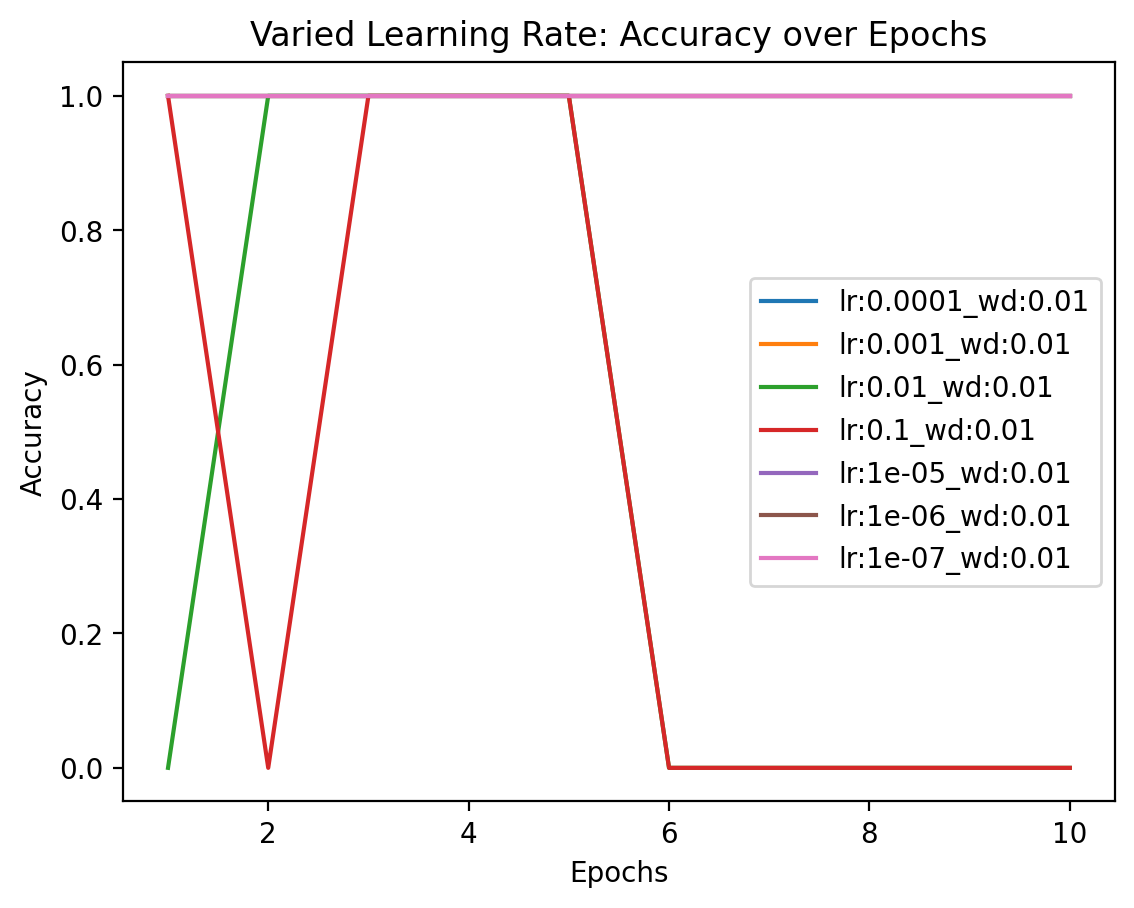

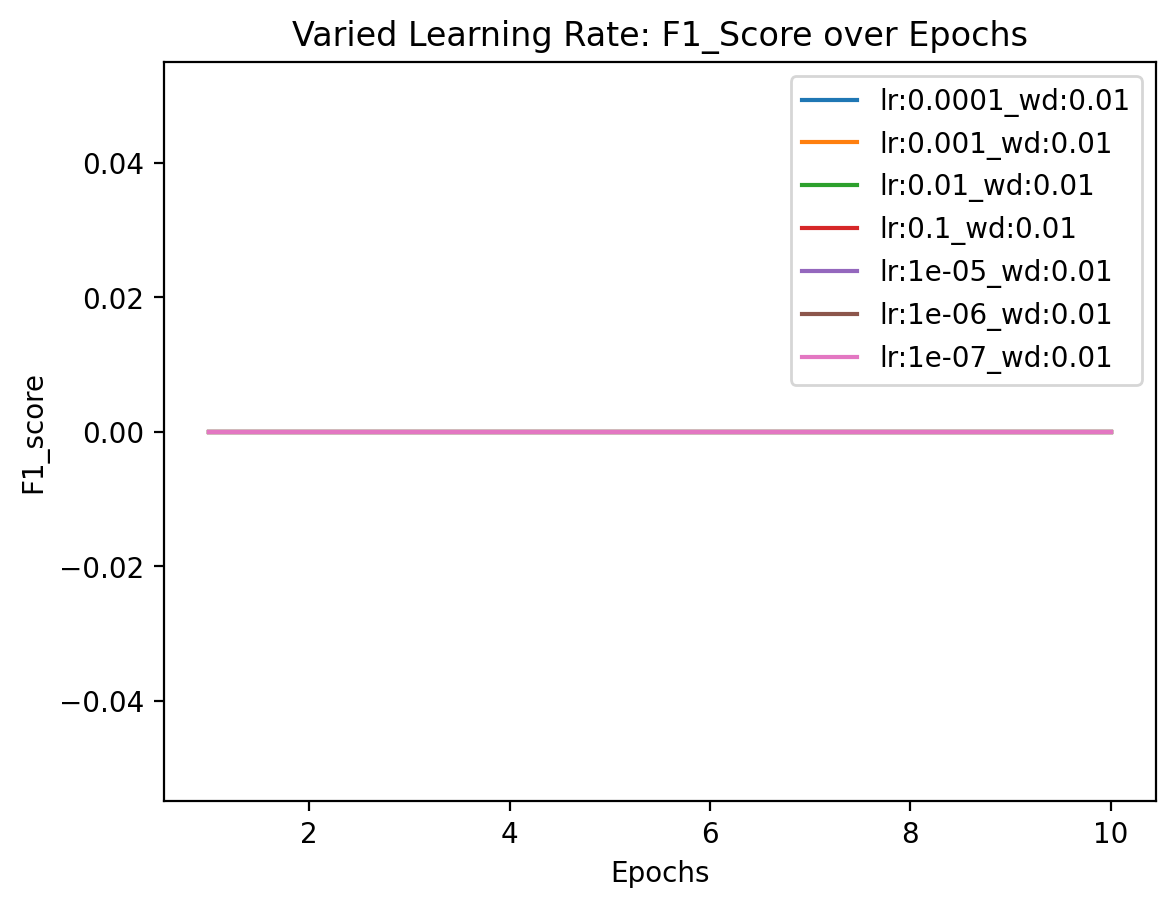

In [17]:
from matplotlib import pyplot as plt


plt.figure(dpi=200)
for params, data in log_hist.items():
    plt.plot(data['epochs'], data['accuracy'], label=params)
    
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Varied Learning Rate: Accuracy over Epochs')
plt.savefig('/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Figures/Varied Learning Rate: Accuracy over Epochs 10 samples.png')
plt.show()

plt.figure(dpi=200)
for params, data in log_hist.items():
    plt.plot(data['epochs'], data['f1_score'], label=params)
    
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('F1_score')
plt.title('Varied Learning Rate: F1_Score over Epochs')
plt.savefig('/home/azureuser/cloudfiles/code/Users/Michael.Sowter/Deep_Learning_Training/Text Classifier/Figures/Varied Learning Rate: F1_Score over Epochs 10 samples.png')
plt.show()

In [18]:
# Run this again with the new insights and compare!